# ERCITE: Impact of chemical pollution on microbial communities through ecological modelling

Emma Cavan  
Tom Clegg, James Rosindell, Samraat Pawar

# Introduction

- Want to find how microbial communities will respond to environmental changes such as pollution. This includes how community assembly responds to stressors. For example, if a chemical stressors caused certain microbes to grow slower, the assembly and resulting community structure would differ from that of an unperturbed community.
- Once this has been modelled in a microbial community can then move on to higher trophic levels.
- As temperature impacts metabolic processes, it is important that first the model is able to meaningfully assemble a community at different temperatures, prior to thinking about chemical stressors. Mass is assumed constant at each trophic level.  


- There is a theory 'Competitive Exclusion Principle' that suggests that you cannot have more species in co-existence than the number of resources. However there examples in the real world that challenge this, e.g. phytoplankton communities in nutrient-limited regions of the oceans.
- To achieve co-existence with few resources communities can either exhibit equalising (minimse fitness differences between species) or stabilising (increase negative intra- over negative inter-specific interactions) mechanisms. See [Chesson 2000](https://www.sciencedirect.com/science/article/pii/S0040580900914862) for more information on this.
- This model explores how 'equalizing' mechanisms, i.e. where consumers with most similar fitnesses/traits remain in co-existence for longest. [Pacciani-Mori et al 2020](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007896) showed a similar result (see Fig. 2 in Pacciani-Mori et al 2020), whereby the more similar two species were, the longer it takes for one to go extinct. 
- Pacciani-Mori et al looked at adaptation of species and co-existence with a small part of the study focussed on size (mass). They did not look at co-existence with temperature or chemical stressor.
- The purpose of this first work as part of this modelling project is to publish the model presented below, and when and why co-existence occurs, the times to extinction/dominance of one species within a group competeting, and these processes vary at different temperatures.


# The Model

This model is adapted from a typical consumer-resource model by [MacArthur 1970](https://www.sciencedirect.com/science/article/pii/0040580970900390), [Marsland et al. (2019)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006793) and [Pacciani-Mori et al 2020](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007896), with Tom Clegg making the first version used in this project [see this notebook](https://nbviewer.jupyter.org/github/CleggTom/Bacteria_EcoFunc/blob/master/notebooks/Metabolic_model.ipynb) which has since been further adapted. The model traces consumer ($C$) concentration (g/mL) and resource ($S$) concentration (g/mL) over time.

## Equations

For an $i$th consumers with $j$ resources the core consumer equation is:

\begin{equation}
dC_i/dt = C_i\Bigl(\sum_{j=1}^{M}U_{ij}s_jv_j(1-\sum_{j \neq k}^{M}l_{jk}) - R_i\Bigl)
\end{equation}

where $C_i$ is the concentration of bacteria cells $i$, $U_{ij}$ is the preference of consumer $i$ to uptake resource $j$ in matrix form, $s_j$ is a function accounting for the fact that the dependence of a species’ growth rate on a given resource concentration saturates as the resource increases such that:

\begin{equation}
s_j = \frac{S_j}{K_j + S_j}
\end{equation}

where $S_j$ is the concentration of resources $j$ and $K_j$ is the half saturation constant of that resource. This is a Type II functional response but a Type I can be selected in the code. $l_{jk}$ is the proportion of $j$ taken up by the consumer that is converted to and released as resource $k$ (i.e. cross-feeding), and $R_i$ is the respiration loss term. 
For a $j$th resource the core equation is:

For a $j$th resource the core equation is:

\begin{equation}
dS_j/dt = \rho_j - \sum_{i=1}^{N}\Bigl(C_iU_{ij}s_j-\sum_{j \neq k}^{M}C_iU_{ij}s_jl_{kj}\Bigl)
\end{equation}

where $\rho$ is the external input of resource $j$ and $l_{kj}$ is the gain and conversion of resource $j$ from $k$.

## Units

|Parameter/Variable name | Param symbol | Units | Initial value |
|---|---|---|---|
|Bacteria | $C_i$ | g/mL | 0.1 | 
|Resources | $S_j$ | g/mL | 1 | 
|Uptake | $U$ | 1/ time | Temperature-dependant | 
|Half saturation constant | $K_j$ | g/mL | 10 |
|Excretion | $l_{jk}$ | n.d | 0.4 |
|Respiration | $R_i$ | 1/time | Temperature-dependant | 
|Resource supply | $\rho_j$ | g/mL time | 1 |


In our model, consumers compete against _some_ other consumers, not the entire community. e.g. If you have 5 resources and 10 consumers, then there will be 5 competiting consumer pairs for the 5 resources. With 15 consumers, there would be competiting triplets for the 5 resources and so on. This set up of competition is expressed in a preferences matrix $U_{ij}$, where each consumer consumers only 1 resourse, but more than 1 consumer can consume a resource.

All consumers are given the same starting concentration in the model. The differences between them can be thought of as different functional traits represented by different parameterisations of $U_{ij}$ and $R_i$ through temperature dependance.


# Analytical Solutions

## Competition - different functional traits

When competing consumer pairs have different functional traits (see section on thermal fitness below) one consumer will outcompete the other. The solution in this situation is easy to find using Python's `sympy` package.

In [3]:
from sympy import *
import scipy as sc
U1, U2, S,k, a, R1, R2,C1, C2,rho, t = var("U1, U2, S, k,a,R1, R2,C1, C2, rho,t",real = True)

dC1_dt = C1 * (((U1 * S)/(k+S) * (1-a)) - R1)
dC2_dt = C2 * (((U2 * S)/(k+S) * (1-a)) - R2)
dS_dt = rho - ((((U1 * S)/(k+S) * C1) - ((U1 * S)/(k+S) * C1 *a)) + (((U2 * S)/(k+S) * C2)- ((U2 * S)/(k+S) * C2 *a)))
dC1_dt, dC2_dt, dS_dt
C1_eqlb = Eq(dC1_dt, 0)
C2_eqlb = Eq(dC2_dt, 0)
S_eqlb = Eq(dS_dt, 0)

pretty_print(solve((C1_eqlb,C2_eqlb, S_eqlb), C1,C2,S))

⎡⎛   ρ       -R₂⋅k     ⎞  ⎛ρ          -R₁⋅k     ⎞⎤
⎢⎜0, ──, ──────────────⎟, ⎜──, 0, ──────────────⎟⎥
⎣⎝   R₂  R₂ + U₂⋅a - U₂⎠  ⎝R₁     R₁ + U₁⋅a - U₁⎠⎦


Note - the leakage term ($l$) is represented by $a$ in `sympy` above as it is difficult to distinguish between $l$ and $1$.

The two solutions above are for when consumer 2 (left) or when consumer 1 (right) wins. The thrid term in each solution is the solution for the resource concentration, which is also known as R* - when multiple species are competing for a single limiting resource, then whichever species can survive at the lowest equilibrium resource level will win (outcompete the other). See work by David Tilman on this.

Stationary points for different functional traits as shown by `sympy` can be written as:

\begin{equation}
C_i = \frac{\rho_j}{R_i}
\end{equation}

\begin{equation}
S_j = R* = \frac{R_iK_j}{U_{ij}(1-l_{kj}) - R_i}
\end{equation}


## Competition - same functional traits

In vary rare cases, at least in the simulation, consumers may be competiting against those with the same functional traits. In this situation neither consumer will become extinct and there will be no winner. This results in a line of points rather than one stationary point. `sympy` does not find the solution for these scenarios and so these were worked out by hand.

For 2 competiting species:

\begin{equation}
C_1 = \frac{\rho_j K_j - C_2R_2}{R_1} + \frac{\rho_j}{R_1U_{1j}(1-l_j)}
\end{equation}

\begin{equation}
C_2 = \frac{\rho_jk_j - C_1R_1}{R_2}+ \frac{\rho_j}{R_2U_{2j}(1-l_j)}
\end{equation}

# Thermal fitness of consumers



In this model only $U_{ij}$ and $R_i$ can be temperature- and size-dependant as they are the only terms that explicitly depend on an individual consumer $i$. Temperature- and size-dependancy are formulated following the Metabolic Theory of Ecology and the Boltzmann-Arrhenis equation. A Sharpe-Schoolfield equation was not used so all model terms (including temperature terms) could be solved and because natural temperatures are generally below an organisms $T_{peak}$.

## Thermal fitness equations

Uptake and respiration can be calculated as:

\begin{equation}
U_{ij} = B_{U}M^{-0.25} * {e^{\frac{-Ea_U}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}
\end{equation}

\begin{equation}
R_i = B_{R}M^{-0.25} * {e^{\frac{-Ea_R}{k}\cdot\Bigl(\frac{1}{T} - \frac{1}{T_{ref}}\Bigl)}}
\end{equation}

where $BM^{-0.25}$ is the mass ($M$) scaled to $\frac{3}{4}$ / M = $M^{-0.25}$ multiplied by a normalisation constant ($B$) that is higher for uptake ($U_{ij}$) than respiration ($R_i$), see below. $Ea$ is the activation energy in eV, $T$ is the temperature and $T_{ref}$ is the reference temperature. All temperatures are expressed in Kelvin (K) and $k$ is the Boltzmann constant of $8.62 x 10^{-5} eV K^{-1}$.

## Thermal fitness units

|Parameter/Variable name | Param symbol | Units | Initial value |
|---|---|---|---|
|Uptake |  $U$ | 1/ time | Temperature-dependant | 
|Respiration | $R$ | 1/time | Temperature-dependant | 
|Normalisation constant | $B$ | g/time| $B_{R}$ < $B_{U}$|
|Mass | $M$ | g| 1 |
|Activation Energy | $Ea$ | eV| $Ea_R$ < $Ea_U$|
|Boltsmann constant | $k$ | ev/K| 0.0000862|
|Reference Temperature | $T_{ref}$ | K| 273.15|
|Temperature | $T$ | K| variable|

## Thermal fitness parameterisations

To assign different thermal fitness properties to each consumer, $Ea$ and $B$ need to be parameterised. Dr Tom Smith at Silwood has experimental results we can use for this. Tom's data shows the response of bacterial growth rate and respiration to temperautre. Growth rate is not the same as uptake, but after much discussion amongst the group we decided could use the parameterisations of growth rate vs temperature as a proxy for uptake vs temperature.

$B_0$, the normalisation constant is inversley related to $Ea$. This means as the slope ($Ea$ ) between growth rate and temperature increases, the growth rate at the reference temperature (0 C) decreases. Tom explains this can be explained by bacteria being either generalists or specalists - where a generalist as a high $B_0$ and shallower slope ($Ea$) increasing the temperautre range over which they can perform well at the expense of higher temperature rates. A specialist will have a lower $B0$ but higher $Ea$ meaning it will perform well at higher temperatures. These relationships are capture from Tom's data and represented in the equations below for $B_U$ and $B_R$.


### Growth rate

Mean $Ea$ = 0.83, range from 0.4 - 1.6. In the model code the median is set high at 1.5 to make sure large difference between $Ea_U$ and $Ea_R$.

From Tom's data (reading regression from plot, significant):
\begin{equation}
B_U = 10^{2.84 - (4.96 \cdot Ea_U)}
\end{equation}

In our model code I added $+4$ to ensure that $B_U$ >> $B_R$, see below. This will need to be revised and justified:

\begin{equation}
B_U = 10^{2.84 - (4.96 \cdot Ea_U)} + 4
\end{equation}


### Respiration
Note, this is from a pers. comm. with Tom and at the time of writing is unpublished data.

Mean $Ea$ = 0.7, range from 0.5 - 1.1.

From Tom's data (regression results actually given to me, not significant):
\begin{equation}
B_R = 10^{1.29 - (1.25 \cdot Ea_R)}
\end{equation}

# Assembly

There is competition for resources between random consumer pairs in this model, so it is inevitable that one consumer will have a competitive advantage over the other. Thus one of the consumers in the pair will become have such a low that they are technically extinct. Assembly models allow these extinct consumers to be removed and replaced with another consumer with randombly assigned traits (here $U$ and $R$ parameters).

Assembly works as follows in this model:
- The number of times assembly is allowed to occur is set ($ass$ in model code)
- The model is run for a set number of time steps ($t_{fin}$)
- Any consumers with a low biomass (< 0.01) are removed
- A new set of $Ea$ and $B_0$ values are compiled to replace the now extinct species, giving way to new species with different traite values ($U$ and $R$)
- The model is re-run until the assembly limit is reached

At the moment the temperature remains constant during all model runs, but the model could be set up so that temperature (or a chemical stressor) changes a parameters (e.g. $U$) between assemblies to see how that changes the resulting community structure.

## Steady state

During each run of the model the resulting concentration of consumers is checked to make sure each consumer has reached steady state, i.e. its concentration is not fluctuating.

This occurs by:
- Substracting the consumer concentration from 50 timesteps before the end of the model run, from the final consumer concentration. So if $t_{fin}$ = 100, then subtracting the consumer concentration at $t$ = 50 from $t$ = 100.
- If there is a difference between the final concentration and an earlier one, 50 timesteps before, then the model is re-run for 100 timesteps but using the final population concentrations as the inputs.
- Once there is no change in concentration of any of the consumers in the last 50 timesteps the loop is broken and the model stops running.

50 timesteps to check for steady state over were chosen when running the model for much longer, i.e. 1000 timesteps, so this might want to be reduced when running the model over shorter periods. However, the model generally reaches steady state pretty quickly, within the first 50 timesteps or so.

# Running the model

The main `.py` file to run model is `Bacteria_vector_modular.py`. This script allows the model to be run at multiple temperatures and for assembly to occur. The script calls in other modules:

- `model_func.py` with the model equations
- `parameters.py`
- `size_temp_funcs.py` containing functions to calculate the Arrhenius-Boltzmann equations

## 20 C, 2 assmeblies

<ipython-input-3-5bee5515c7ef>:28: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t = sc.linspace(0,t_fin-1,t_fin) # Time steps
<ipython-input-3-5bee5515c7ef>:29: DeprecationWarning: scipy.full is deprecated and will be removed in SciPy 2.0.0, use numpy.full instead
  x0 = np.concatenate((sc.full([N], (0.1)),sc.full([M], (0.1)))) # Starting concentration for resources and consumers


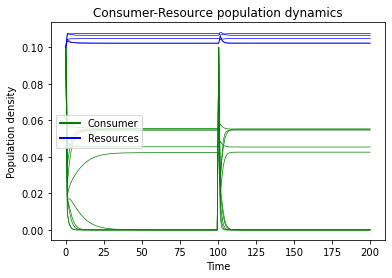

(array([[0.1      , 0.1      , 0.1      , ..., 0.1      , 0.1      ,
         0.1      ],
        [0.0253564, 0.0575481, 0.016629 , ..., 0.1043059, 0.106858 ,
         0.1043201],
        [0.0339072, 0.0568007, 0.0171597, ..., 0.1044992, 0.107162 ,
         0.1036208],
        ...,
        [0.0546491, 0.0551901, 0.       , ..., 0.1046835, 0.1074065,
         0.1022248],
        [0.0546491, 0.0551901, 0.       , ..., 0.1046835, 0.1074065,
         0.1022248],
        [0.0546491, 0.0551901, 0.       , ..., 0.1046835, 0.1074065,
         0.1022248]]),
 array([320.63386523, 315.10783759, 307.88767956, 287.20485242,
        308.78107238, 299.96258075, 321.56424688, 295.64824223,
        309.6770578 , 302.58134872]),
 array([19.7689441 , 19.76665224, 19.76359683, 19.75443344, 19.76397873,
        19.76016006, 19.76932611, 19.75825101, 19.76436064, 19.76130559]))

In [3]:
import Bacteria_vector_modular as bvm
import parameters as par
import model_func as mod
import matplotlib.pylab as plt
from matplotlib.lines import Line2D
from scipy.integrate import odeint
import scipy as sc
import numpy as np
import random
 
# Set up parameters
N = 10 # Number of consumers
M = 5 # Number of resources

# Temperature params
k = 0.0000862 # Boltzman constant
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk = 20 # Peak above Tref, degrees C
T_pk = Tref + pk # Peak above Tref, Kelvin
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
t_n = 21 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 2 # Assembly number, i.e. how many times the system can assemble

t_fin = 100 # Number of time steps
t = sc.linspace(0,t_fin-1,t_fin) # Time steps
x0 = np.concatenate((sc.full([N], (0.1)),sc.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 2 # Functional response, Type I or II
K = 10 # Carrying capacity, kept constant with temperature

# Run the model
bvm.ass_temp_run(t, N, M, t_n,  Tref, Ma, k, ass, x0, t_fin, T_pk , Ea_D,  typ)

The plot above shows the model run at 20 degC and assembly allowed to occur resulting in 2 runs of the model. If runs took longer than 100 timesteps then the consumers had not reached steady state. In this set up there are 10 consumers and 5 resources, meaning there are 5 competiting pairs of consumers. At the end of each model run 5 consumers will go extinct, unless they are competiting against a consumer with the same functional (temperature) traits.  

The arrays printed are an array of all the consumer and resource concentrations at each timestep, the $U$ values as a vector (not matrix) and $R$.


## 20 and 21 degC, 2 assemblies

<ipython-input-4-3b36f7f50cab>:18: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  t = sc.linspace(0,t_fin-1,t_fin) # Time steps
<ipython-input-4-3b36f7f50cab>:19: DeprecationWarning: scipy.full is deprecated and will be removed in SciPy 2.0.0, use numpy.full instead
  x0 = np.concatenate((sc.full([N], (0.1)),sc.full([M], (0.1)))) # Starting concentration for resources and consumers


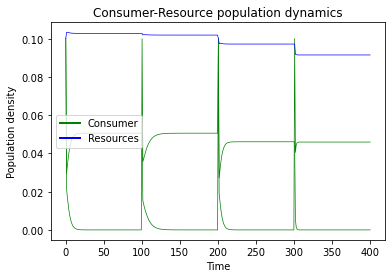

(array([[0.1      , 0.1      , 0.1      ],
        [0.0295866, 0.0215395, 0.1033297],
        [0.0333331, 0.0172644, 0.1033598],
        ...,
        [0.       , 0.0459364, 0.091481 ],
        [0.       , 0.0459364, 0.091481 ],
        [0.       , 0.0459364, 0.091481 ]]),
 array([396.60736896, 396.60736896]),
 array([21.69899517, 21.76921831]))

In [4]:
# Set up parameters
N = 10 # Number of consumers
M = 5 # Number of resources

# Temperature params
k = 0.0000862 # Boltzman constant
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk = 20 # Peak above Tref, degrees C
T_pk = Tref + pk # Peak above Tref, Kelvin
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
t_n = 22 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 2 # Assembly number, i.e. how many times the system can assemble

t_fin = 100 # Number of time steps
t = sc.linspace(0,t_fin-1,t_fin) # Time steps
x0 = np.concatenate((sc.full([N], (0.1)),sc.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 2 # Functional response, Type I or II
K = 10 # Carrying capacity, kept constant with temperature

# Run the model
bvm.ass_temp_run(t, N, M, t_n,  Tref, Ma, k, ass, x0, t_fin, T_pk , Ea_D,  typ)

The above plot now shows 4 model runs. The first 2 are at 20 degC showing assembly occuring, the second 2 are at 21 degC. At the slightly higher temperature resource and consumer concentrations are lower.

# Key results

## When a consumer wins and why
We can predict which consumer will outcompete its competitor using the analytical solutions. But we can also do it more simply by finding which consumer has the highest $U/R$ ratio.

The bacteria with the highest $U$/$R$ wins (as also in Chesson 2000 - equalising mechanism) as has highest uptake relative to respiration loss, and will have lowest R*. Its competitor's concentration will go to 0. We call $U/R$ the Metabolic Ratio of a consumer.

As we know that if the Metabolic Ratio of two consumers are the same then neither will go extinct, then we can suppose that the closer the Metabolic ratio is of each consumer then it will take longer for one to go extinct, as shown in the work by Pacciani-Mori et al  2020.

## Time to equilibrium - Metabolic Ratio

Below the model is run and the time to equilibrium is calculated by finding the number of timesteps in which a consumer had different concentration values, i.e. had not reached steady state. In this model concentrations do not fluctuate at steady state, they are constant, so any change or difference in concentration mean the steady state has not been reached. Microbes competing for the same resource should take a similar number of timesteps to reach steady state.

I calculated the difference in metabolic ratio between competitors, as the more similar they are (i.e. the difference is close to 1) the longer it should take for steady state to be reached. If they are identical so $U_1/R_1$ = $U_2/R_2$ and therefore $U_1/R_1$ / $U_2/R_2$ = 1, steady state should be reached quickly.  

This should result in a plot similar to those shown in Section 8 in [the old notebook Competition_traits_model.ipynb](https://nbviewer.jupyter.org/github/e-cavan/Bacteria_Model/blob/master/Code/Old/Competition_traits_model.ipynb). 

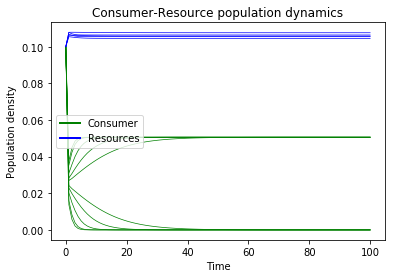

[15.58364291 14.91595143 15.80433299 15.94138622 16.36635884 15.66845816
 15.75891095 15.09274734 15.399013   15.4891073 ]
[0.99458688 0.94650902 1.04714752 1.0352213  1.05663668]
[ 15.  57.  17.  31. 100.  14.  57.  18.  31.  99.]
[18.66263025 18.7632159  18.6314731  18.61260877 18.55635098 18.65053979
 18.63780606 18.73560834 18.68946576 18.67628121]


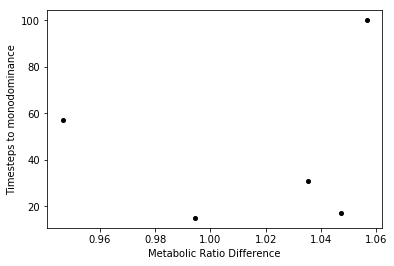

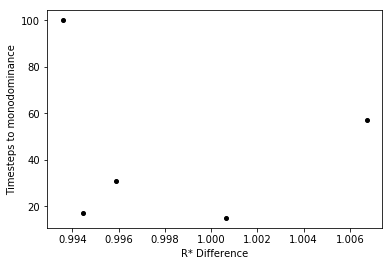

In [6]:
# Set up parameters
N = 10 # Number of consumers
M = 5 # Number of resources

# Temperature params
k = 0.0000862 # Boltzman constant
Tref = 273.15 # Reference temperature Kelvin, 0 degrees C
pk = 20 # Peak above Tref, degrees C
T_pk = Tref + pk # Peak above Tref, Kelvin
Ma = 1 # Mass
Ea_D = np.repeat(3.5,N) # Deactivation energy - only used if use Sharpe-Schoolfield temp-dependance
t_n = 21 # Number of temperatures to run the model at, model starts at 20

# Assembly
ass = 1 # Assembly number, i.e. how many times the system can assemble

t_fin = 100 # Number of time steps
t = sc.linspace(0,t_fin-1,t_fin) # Time steps
x0 = np.concatenate((sc.full([N], (0.1)),sc.full([M], (0.1)))) # Starting concentration for resources and consumers
typ = 2 # Functional response, Type I or II
K = 10 # Carrying capacity, kept constant with temperature

# Run the model
res, Ut, Rt = bvm.ass_temp_run(t, N, M, t_n,  Tref, Ma, k, ass, x0, t_fin, T_pk , Ea_D,  typ)

# Time to equilibrium
meta = Ut/Rt # find metabolic ratio for each consumer

time = np.array([])   
for i in range(N): 
   c = len(np.unique(res[:,i])) 
   time = np.append(time, c)
    
meta_diff = meta[0:M]/meta[M:N]
#meta_diff = np.round(abs(1-meta_diff), 4)

print(meta)
print(meta_diff)
print(time)

# R*
l = 0.4
rstar = (Ut*K)/((Ut*(1-l))-Rt)
rstar_diff = rstar[0:M]/rstar[M:N]
#rstar_diff = np.round(abs(1-rstar_diff), 4)
print(rstar)

plt.plot(meta_diff, time[0:M],'ko', markersize=4)
plt.xlabel('Metabolic Ratio Difference')
plt.ylabel('Timesteps to monodominance')
plt.show()

plt.plot(rstar_diff, time[0:M],'ko', markersize=4)
plt.xlabel('R* Difference')
plt.ylabel('Timesteps to monodominance')
plt.show()


The plots above suggest there is no impact of  the metabolic ratio or R* on the time it takes for competing pairs to reach steady state. 

In the old `Competition_traits_model.ipynb` [notebook](https://nbviewer.jupyter.org/github/e-cavan/Bacteria_Model/blob/master/Code/Old/Competition_traits_model.ipynb#2-species-system,-long-simulation-time) the Metabolic Ratio was forced. $U$ was set as in the `Vector_testing_model.py` file, and then in the notebook $R$ (written as $Rm$) calculated based on a predefined $U/R$. The main difference between the model runs is that when using the `Bacteria_vector_modular.py` script, i.e. the most comprehensive version, $U$ and $R$ are calculated as a function of temperature, and $U/R$ is not forced.

So the difference in results and not observing a pattern between $U/R$ and time to monodominance/steady state could be due to:  
- Model is set up incorrectly in `Bacteria_vector_modular.py`
- My analysis of how to find the time to monodominance in this notebook above is not correct
- The result found in `Vector_testing_model.py` is not correct
- There should not be a relationship between the $U/R$ or $R*$ of different species and the time to monodominance of the competiting pairs.

Based on what we understand and the work put into this in 2020, I would think the latter is not true and some part of the coding/model is not quite right. However, I could be wrong!

# Next steps

- Work out how the time to steady state and completion of community assembly is driven by the differences in function traits between species competing for resources, i.e. the result in Section 8.2 above. Basically, see if this result can work!
- Then investigate how assembly time/ time to monodominance/steady state changes with different temperatures.

The resulting manuscript should be able to show:
- A model with community assembly
- Can predict which consumers will co-exist and which wont based on U/R
- Can predict how long competiting species will take to reach steady state based on $U
- How U/R changes with temperature
- How assembly changes when change temperature

As a discussion point, elude to how might simulate other kind of disturbances e.g. from pollution.